00DataExploration

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing

In [2]:
''' 
Dataset

The challenge data is obtained from two geographically distinct U.S hospital systems with two different EMR or Electronic Medical Record systems. 
The two hospitals are Beth Israel Deaconess Medical Center (hospital system A), Emory University Hospital (hospital system B). 
These data were collected over 10 years with the approval of appropriate Institutional Review Boards.
Data were collected for 40,336 patients from both the hospitals, and each patient has their own data files.
The data from both the hospitals were posted on the Physio net Challenge 2019 and were available for the public and for download. 
The data consisted of a combination of hourly vital sign summaries, laboratory values, and patients’ demographics.
To be more specific, the dataset consisted of 40 clinical variables where there were 8 vital sign variables, 26 laboratory values, and 6 static patient descriptions.
These data included over 2.5 million hourly time windows and 15 million data points.
As mentioned, the data is extracted from the EMR and underwent series of preprocessing steps prior to formal analysis and development.
The patient features were condensed into hourly time window for simplified model development and testing.
The patient data is labeled in accordance with the Sepsis-3 clinical criteria. The missing and erroneous data has been present in the dataset.

Features

01.	HR Heart rate (beats per minute)
02.	O2Sat Pulse oximetry (%) 
03.	Temp Temperature (deg C) 
04.	SBP Systolic BP (mm Hg)
05.	MAP Mean arterial pressure (mm Hg) 
06. DBP Diastolic BP (mm Hg)
07. Resp Respiration rate (breaths per minute)
08. EtCO2 End tidal carbon dioxide (mm Hg) 
09. BaseExcess Excess bicarbonate (mmol/L) 
10. HCO3 Bicarbonate (mmol/L) 
11. FiO2 Fraction of inspired oxygen (%) 
12. pH pH 
13. PaCO2 Partial pressure of carbon dioxide from arterial blood (mm Hg) 
14. SaO2 Oxygen saturation from arterial blood (%) 
15. AST Aspartate transaminase (IU/L) 
16. BUN Blood urea nitrogen (mg/dL) 
17. Alkalinephos Alkaline phosphatase (IU/L) 
18. Calcium Calcium (mg/dL) 
19. Chloride Chloride (mmol/L) 
20. Creatinine Creatinine (mg/dL) 
21. Bilirubin direct Direct bilirubin (mg/dL) 
22. Glucose Serum glucose (mg/dL) 
23. Lactate Lactic acid (mg/dL) 
24. Magnesium Magnesium (mmol/dL) 
25. Phosphate Phosphate (mg/dL) 
26. Potassium Potassiam (mmol/L) 
27. Bilirubin total Total bilirubin (mg/dL) 
28. TroponinI Troponin I (ng/mL) 
29. Hct Hematocrit (%) 
30. Hgb Hemoglobin (g/dL) 
31. PTT Partial thromboplastin time (seconds) 
32. WBC Leukocyte count (count/L) 
33. Fibrinogen Fibrinogen concentration (mg/dL) 
34. Platelets Platelet count (count/mL) 
35. Age Age (years) 
36. Gender Female (0) or male (1) 
37. Unit1 Administrative identifier for ICU unit (MICU); false (0) or true (1) 
38. Unit2 Administrative identifier for ICU unit (SICU); false (0) or true (1) 
39. HospAdmTime Time between hospital and ICU admission (hours since ICU admission) 
40. ICULOS ICU length of stay (hours since ICU admission) 
41. SepsisLabel For septic patients, SepsisLabel is 1 if t ≥ tsepsis −6 and 0 if t < tsepsis −6. For non-septic patients, SepsisLabel is 0.

Attribute Types.

HR                  float64
O2Sat               float64
Temp                float64
SBP                 float64
MAP                 float64
DBP                 float64
Resp                float64
BaseExcess          float64
HCO3                float64
FiO2                float64
pH                  float64
PaCO2               float64
SaO2                float64
AST                 float64
BUN                 float64
Alkalinephos        float64
Calcium             float64
Chloride            float64
Creatinine          float64
Bilirubin_direct    float64
Glucose             float64
Lactate             float64
Magnesium           float64
Phosphate           float64
Potassium           float64
Bilirubin_total     float64
TroponinI           float64
Hct                 float64
Hgb                 float64
PTT                 float64
WBC                 float64
Fibrinogen          float64
Platelets           float64
Age                 float64
Gender                int64
HospAdmTime         float64
ICULOS                int64
SepsisLabel           int64

'''


vital_signs = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp", "EtCO2"]

lab_values = ['BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
              'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
              'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
              'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
              'Fibrinogen', 'Platelets'
            ]

demographics = ["Age", "HospAdmTime", "ICULOS"]


In [2]:
RAW_DATA_DIR = r"D:\\DesktopMT\\FRI\\semester_1\\ML\\Proj\\Sepsis-Analysis\\raw_data"

def get_patients_df(in_dir):
    patients = []

    for patient in sorted(os.listdir(in_dir)):    
        patients.append(pd.read_csv(in_dir + '\\' + patient, sep = "|"))

    return pd.concat(patients)

df = get_patients_df(in_dir = RAW_DATA_DIR) 

In [3]:
'''
Feature statistics.
'''

(rows, cols) = df.shape
print(str(rows) + " Instances")
print(str(cols) + " Features")

df.describe()

790215 Instances
41 Features


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
count,729026.000000,695136.000000,266901.000000,670014.000000,709357.000000,409918.000000,712957.00000,0.0,82381.000000,63617.000000,...,59348.000000,6030.000000,51499.000000,790215.000000,790215.000000,404050.000000,404050.000000,790207.000000,790215.000000,790215.000000
mean,84.985264,97.265688,37.026737,120.962359,78.767345,59.985809,18.77346,NaN,-0.647537,24.094476,...,11.936604,292.251642,199.617841,63.016780,0.577721,0.507101,0.492899,-52.025757,27.198518,0.021685
std,16.940431,2.908794,0.780317,21.520567,15.044038,12.572771,5.39575,NaN,4.286641,4.396192,...,7.562679,158.632042,109.244146,16.133632,0.493923,0.499950,0.499950,155.864937,28.190940,0.145654
min,20.000000,20.000000,20.900000,22.000000,20.000000,20.000000,1.00000,NaN,-32.000000,0.000000,...,0.100000,34.000000,5.000000,18.110000,0.000000,0.000000,0.000000,-3710.660000,1.000000,0.000000
25%,73.000000,96.000000,36.560000,105.000000,68.000000,51.000000,15.00000,NaN,-3.000000,22.000000,...,8.000000,184.000000,127.000000,52.740000,0.000000,0.000000,0.000000,-38.090000,11.000000,0.000000
50%,84.000000,98.000000,37.060000,118.500000,77.000000,58.500000,18.00000,NaN,0.000000,24.000000,...,10.800000,250.000000,181.000000,65.250000,1.000000,1.000000,0.000000,-2.600000,21.000000,0.000000
75%,96.000000,99.500000,37.550000,134.000000,87.330000,67.000000,22.00000,NaN,1.000000,27.000000,...,14.300000,356.750000,247.000000,75.890000,1.000000,1.000000,1.000000,-0.020000,35.000000,0.000000
max,280.000000,100.000000,42.220000,281.000000,300.000000,298.000000,69.00000,NaN,100.000000,55.000000,...,422.900000,1760.000000,1783.000000,89.000000,1.000000,1.000000,1.000000,23.990000,336.000000,1.000000


0    773079
1     17136
Name: SepsisLabel, dtype: int64


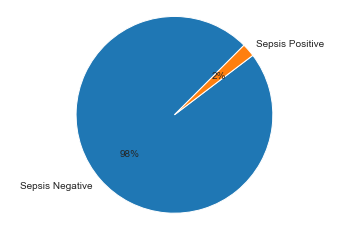

In [28]:
'''
Ratio of sepsis_positive vs sepsis_negative patients.

'''

label_count = df['SepsisLabel'].value_counts()
print(label_count)

fig1, ax1 = plt.subplots()
ax1.pie([(label_count[0]/(label_count[0]+label_count[1]))*100, (label_count[1]/(label_count[0]+label_count[1]))*100], labels = ['Sepsis Negative', 'Sepsis Positive'], autopct = '%1.0f%%',startangle=45)
ax1.axis('equal')
plt.show()

In [5]:
'''
Number of features with more than 90% of missing values 
'''
MISSING_PERC = 90
missing_feeatures_perc = (df.isnull().sum() / rows) * 100
len([ att for att, per in missing_feeatures_perc.items() if per > MISSING_PERC])

21

<AxesSubplot:>

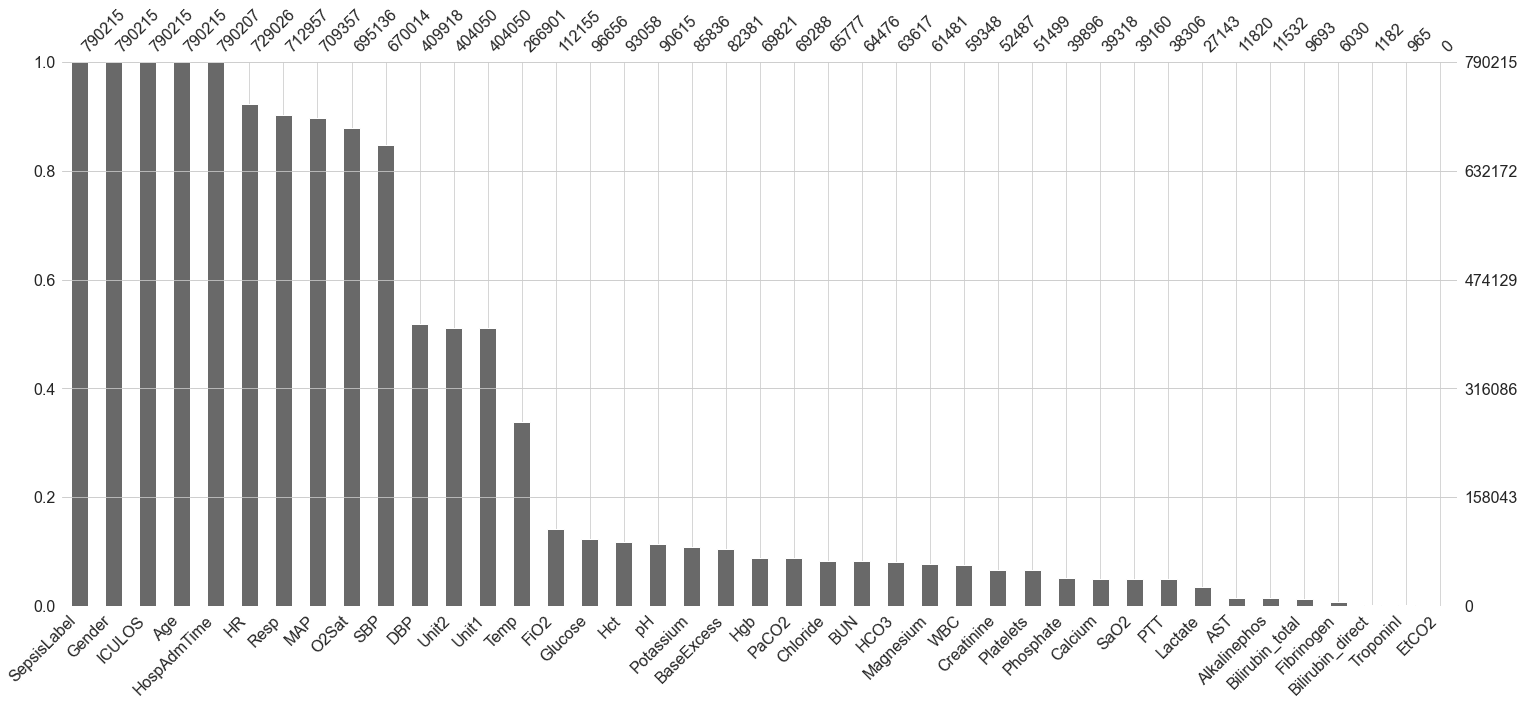

In [40]:
''' 
Display percantage of defined values for each feature.
'''
msno.bar(df, sort = "descending")

array([[<AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'O2Sat'}>,
        <AxesSubplot:title={'center':'Temp'}>,
        <AxesSubplot:title={'center':'SBP'}>,
        <AxesSubplot:title={'center':'MAP'}>,
        <AxesSubplot:title={'center':'DBP'}>],
       [<AxesSubplot:title={'center':'Resp'}>,
        <AxesSubplot:title={'center':'EtCO2'}>,
        <AxesSubplot:title={'center':'BaseExcess'}>,
        <AxesSubplot:title={'center':'HCO3'}>,
        <AxesSubplot:title={'center':'FiO2'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'PaCO2'}>,
        <AxesSubplot:title={'center':'SaO2'}>,
        <AxesSubplot:title={'center':'AST'}>,
        <AxesSubplot:title={'center':'BUN'}>,
        <AxesSubplot:title={'center':'Alkalinephos'}>,
        <AxesSubplot:title={'center':'Calcium'}>],
       [<AxesSubplot:title={'center':'Chloride'}>,
        <AxesSubplot:title={'center':'Creatinine'}>,
        <AxesSubplot:title={'center'

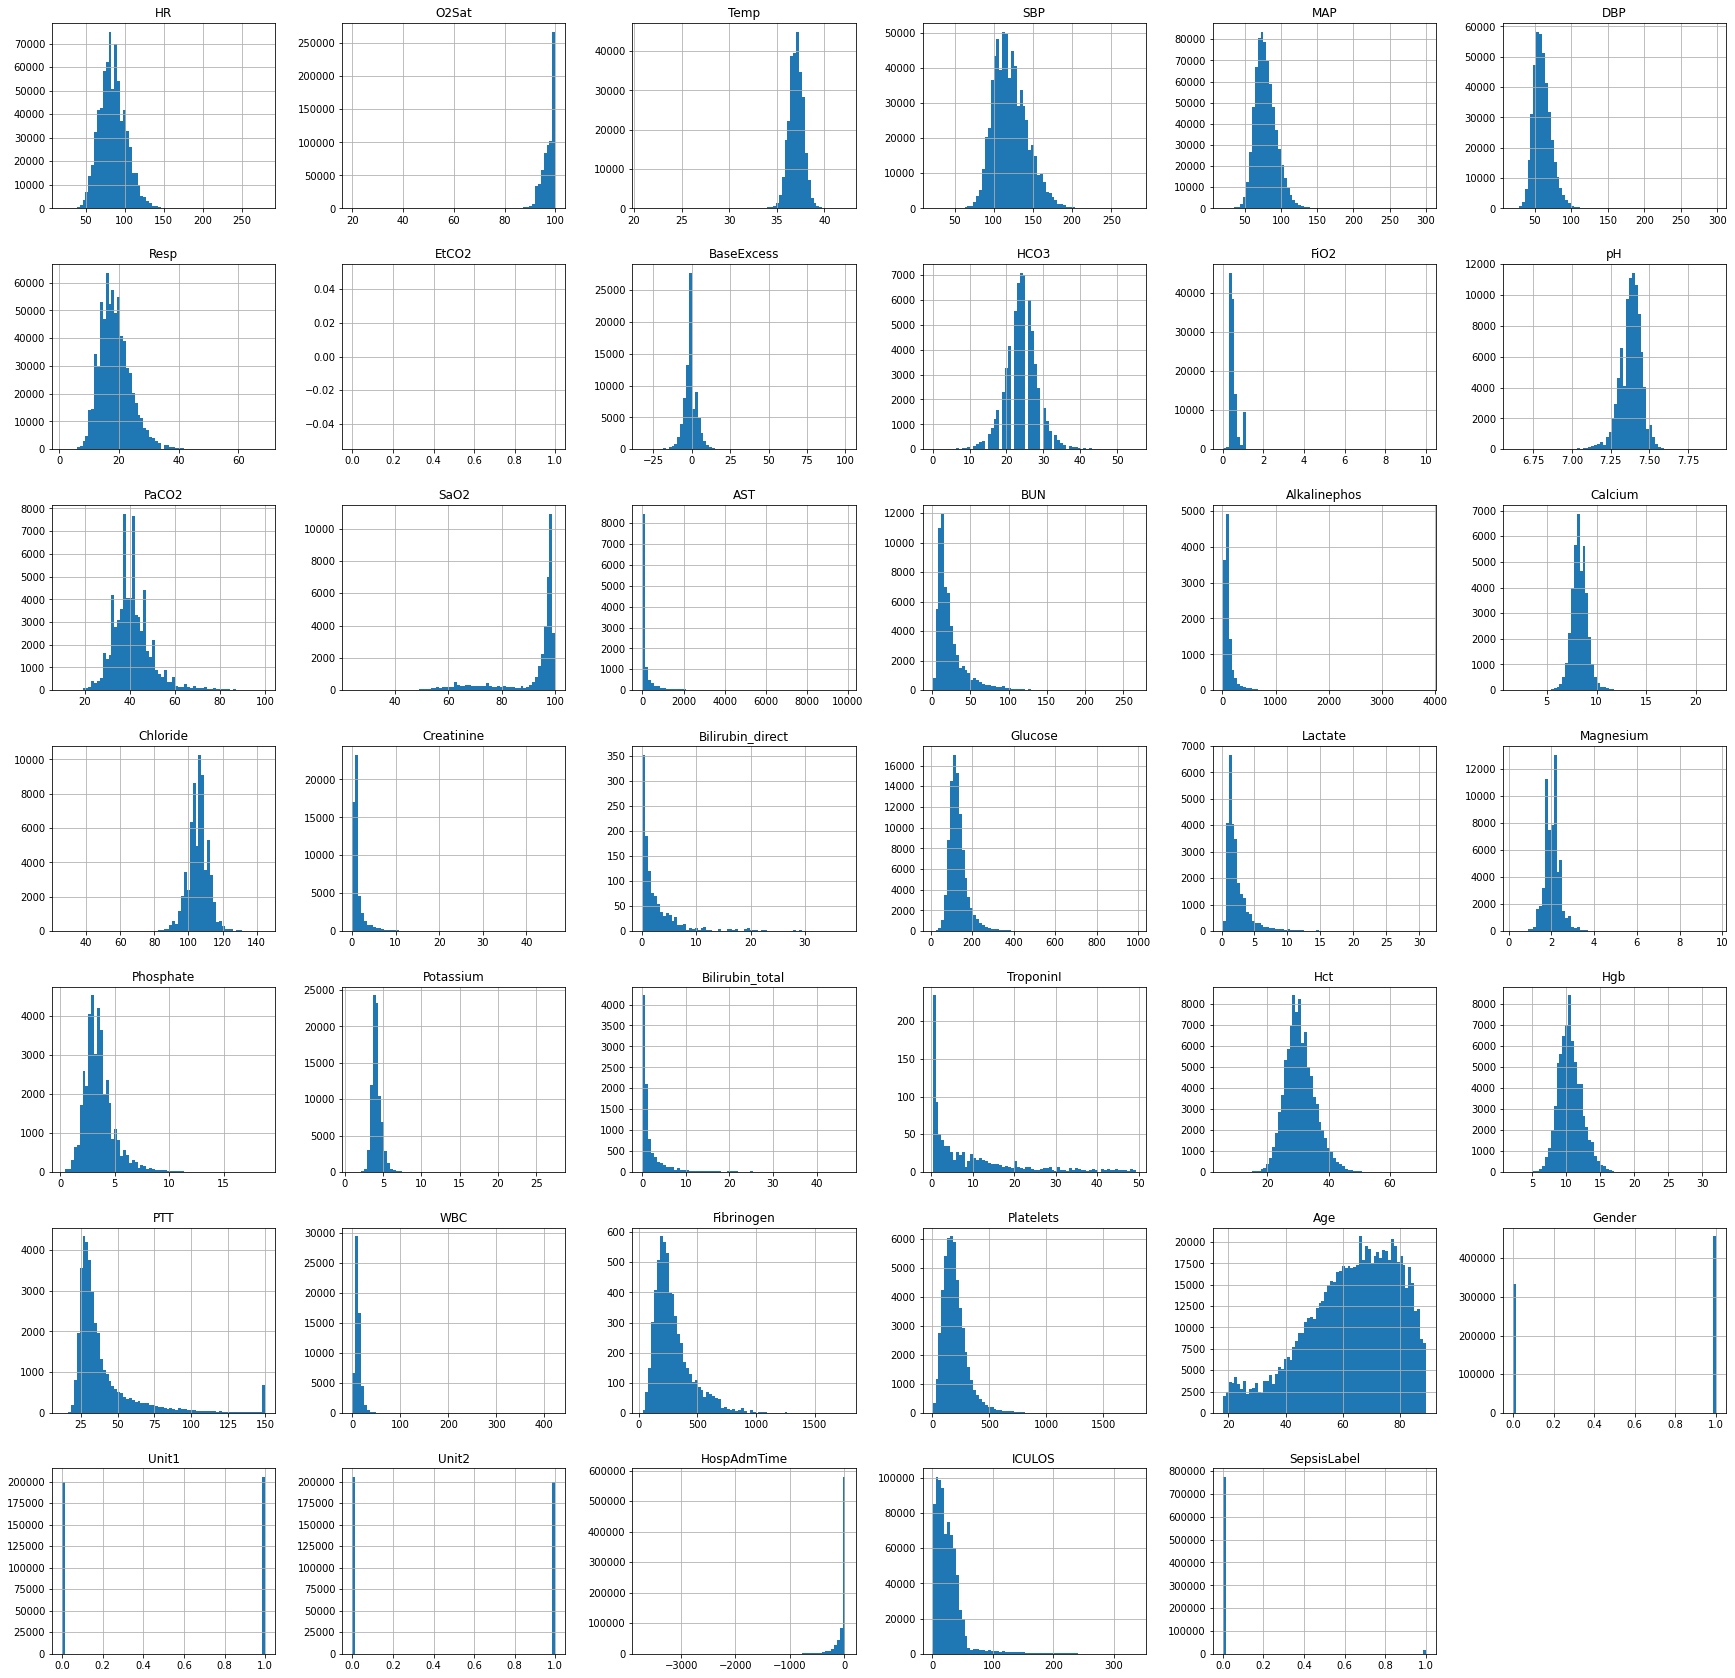

In [19]:

df["Gender"].unique()
df.hist(figsize = (30,30), bins = 70)

In [42]:
''' 
Feature distribution of every class
'''

df1, df0 = df[(mask:=df['SepsisLabel'] == 1)], df[~mask]
print(df1.shape)
print(df0.shape)
print(df1.shape[0] / df0.shape[0])


(17136, 41)
(773079, 41)
0.022165910599046153


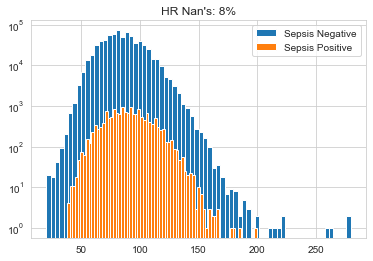

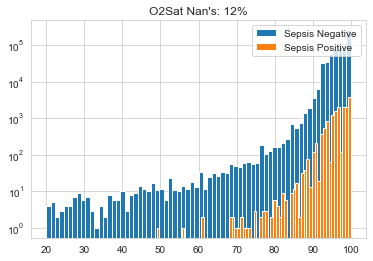

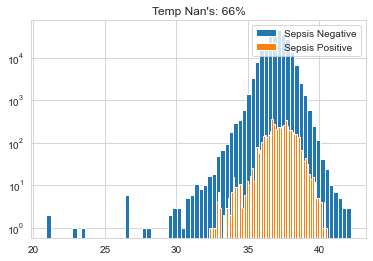

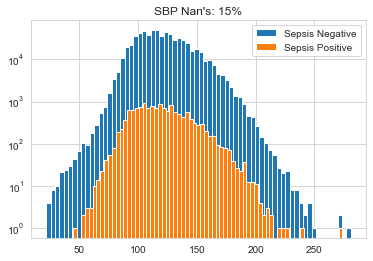

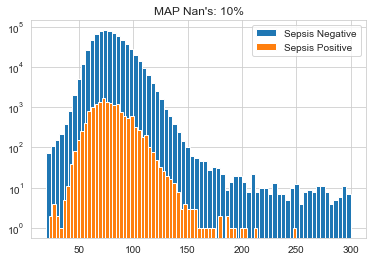

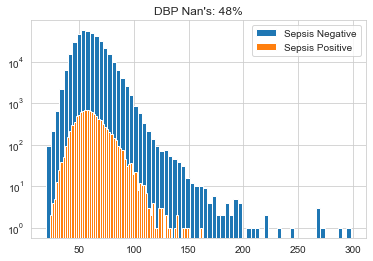

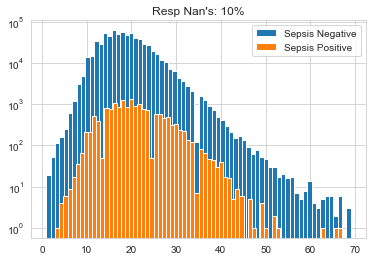

C:\Users\marko\AppData\Local\Temp/ipykernel_4612/2905176337.py:8: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


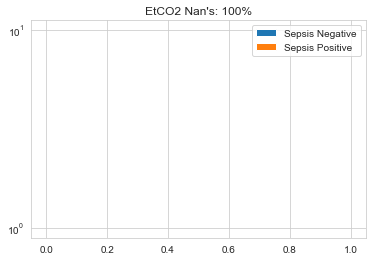

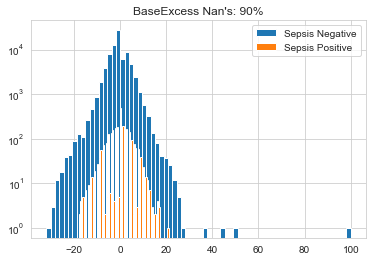

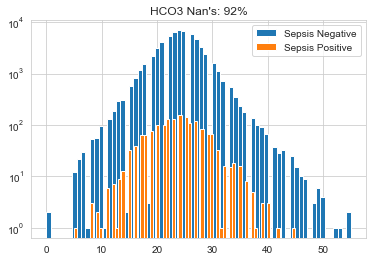

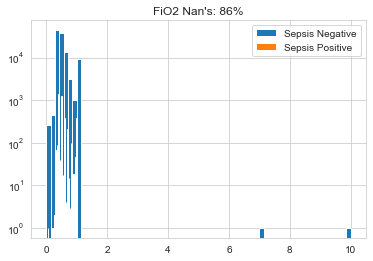

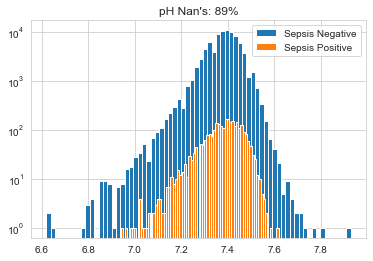

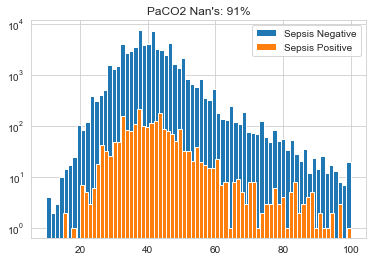

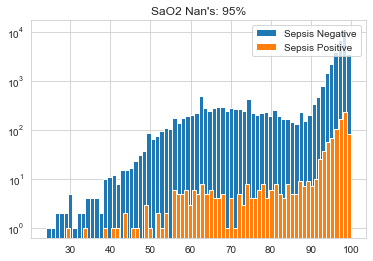

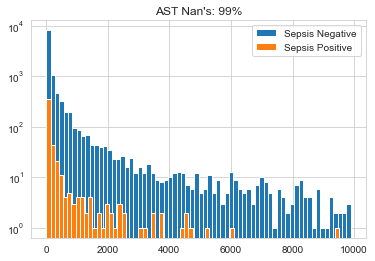

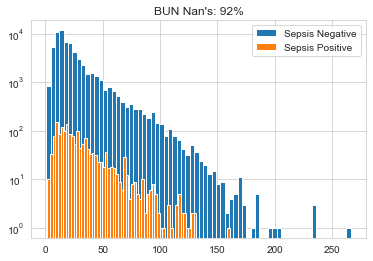

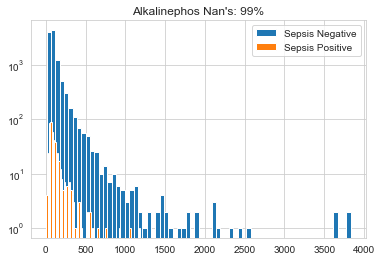

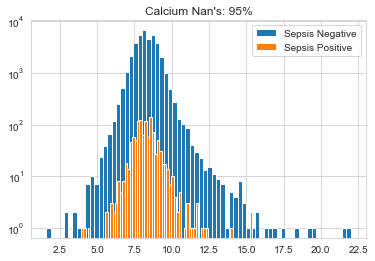

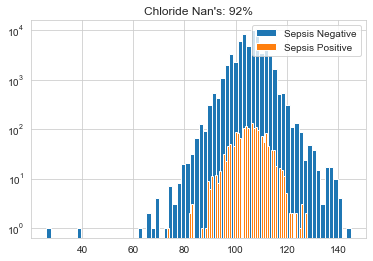

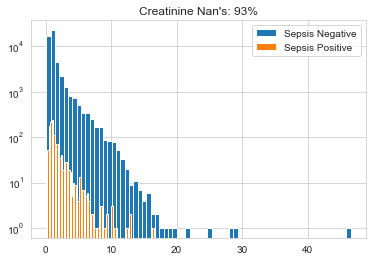

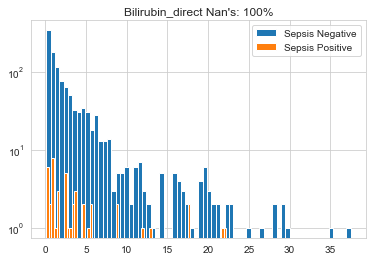

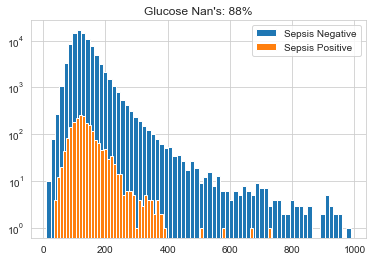

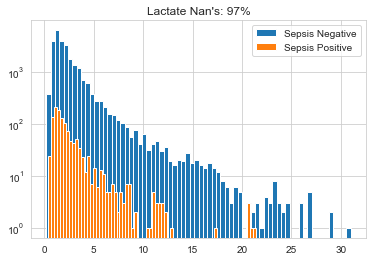

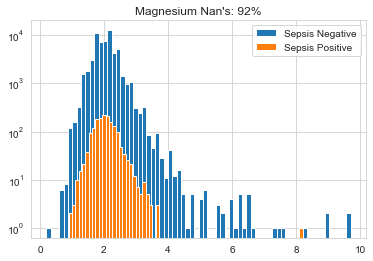

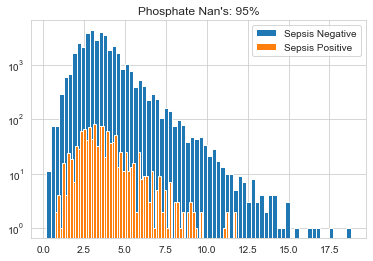

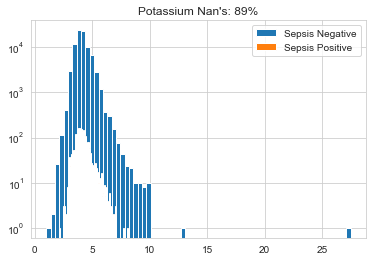

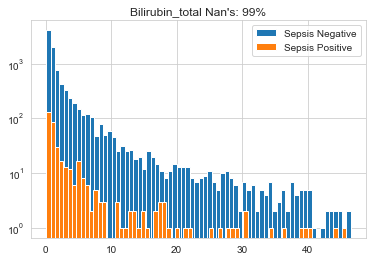

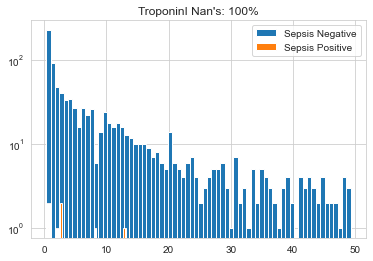

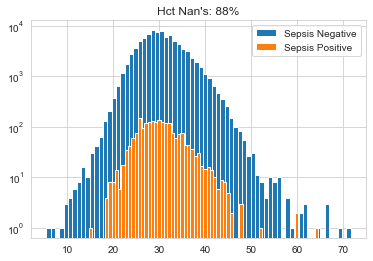

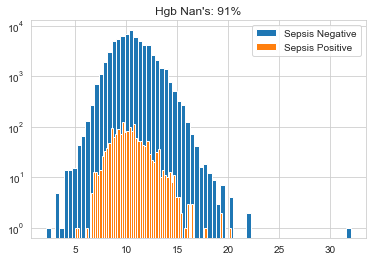

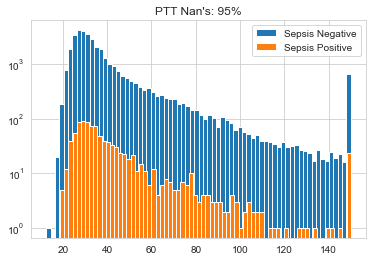

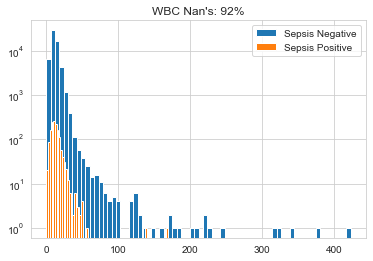

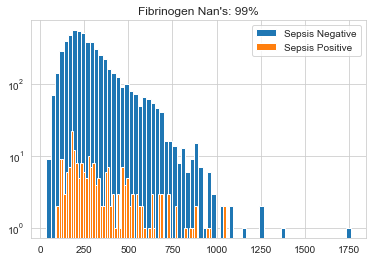

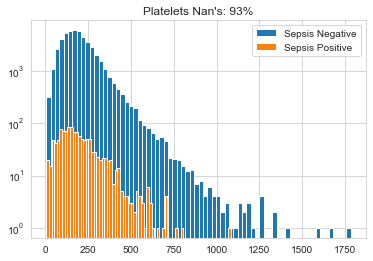

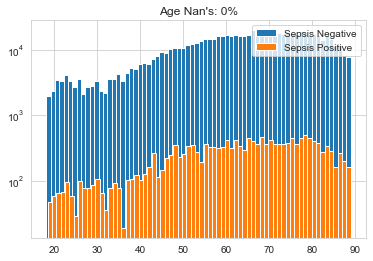

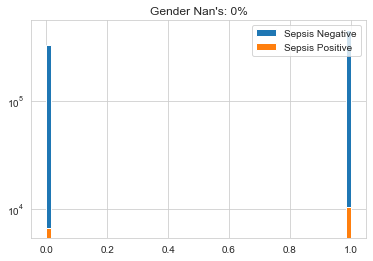

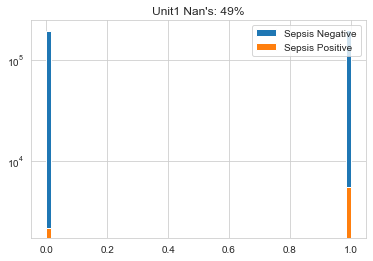

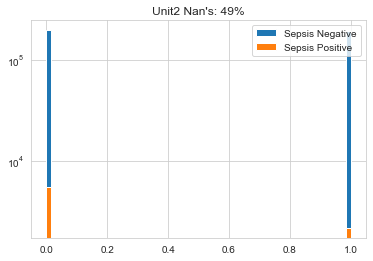

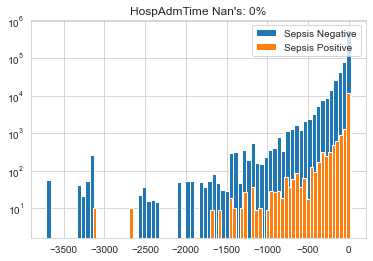

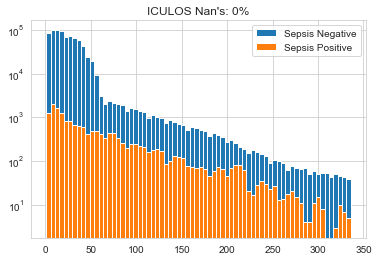

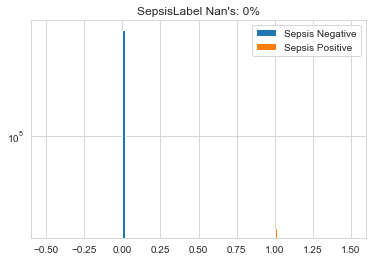

' \nRemove features with high nans percentage and not visiable diference in distribution.\nFiO2\nPaC02\nSa02\nAST\nAlkalinephos\nBilirubin_total\n'

In [55]:
for column in df1:  

    if len(df1[column]) >  0:
        plt.hist(df0[column].dropna(), bins = 70, label='Sepsis Negative')
        plt.hist(df1[column].dropna(), bins = 70, label='Sepsis Positive')
        plt.legend(loc='upper right')
        plt.title(column + " Nan's: " + str(round(100* df[column].isnull().sum() / len(df[column]))) + "%")
        plt.yscale('log')
        plt.show()

''' 
Remove features with high nans percentage and not visiable diference in distribution.
FiO2
PaC02
Sa02
AST
Alkalinephos
Bilirubin_total
'''

In [ ]:
''' 
Scatter plot of all the attibutes.
'''

features = df.columns[0: -1] 
feature_combinations = [(features[i],features[j]) for i in range(len(features)) for j in range(i+1, len(features))]

sns.set_style('whitegrid')
for feature_comb in feature_combinations:
    sns.FacetGrid(df, hue='SepsisLabel', size=5) .map(plt.scatter, feature_comb[0], feature_comb[1]).add_legend()
    plt.show()

<AxesSubplot:>

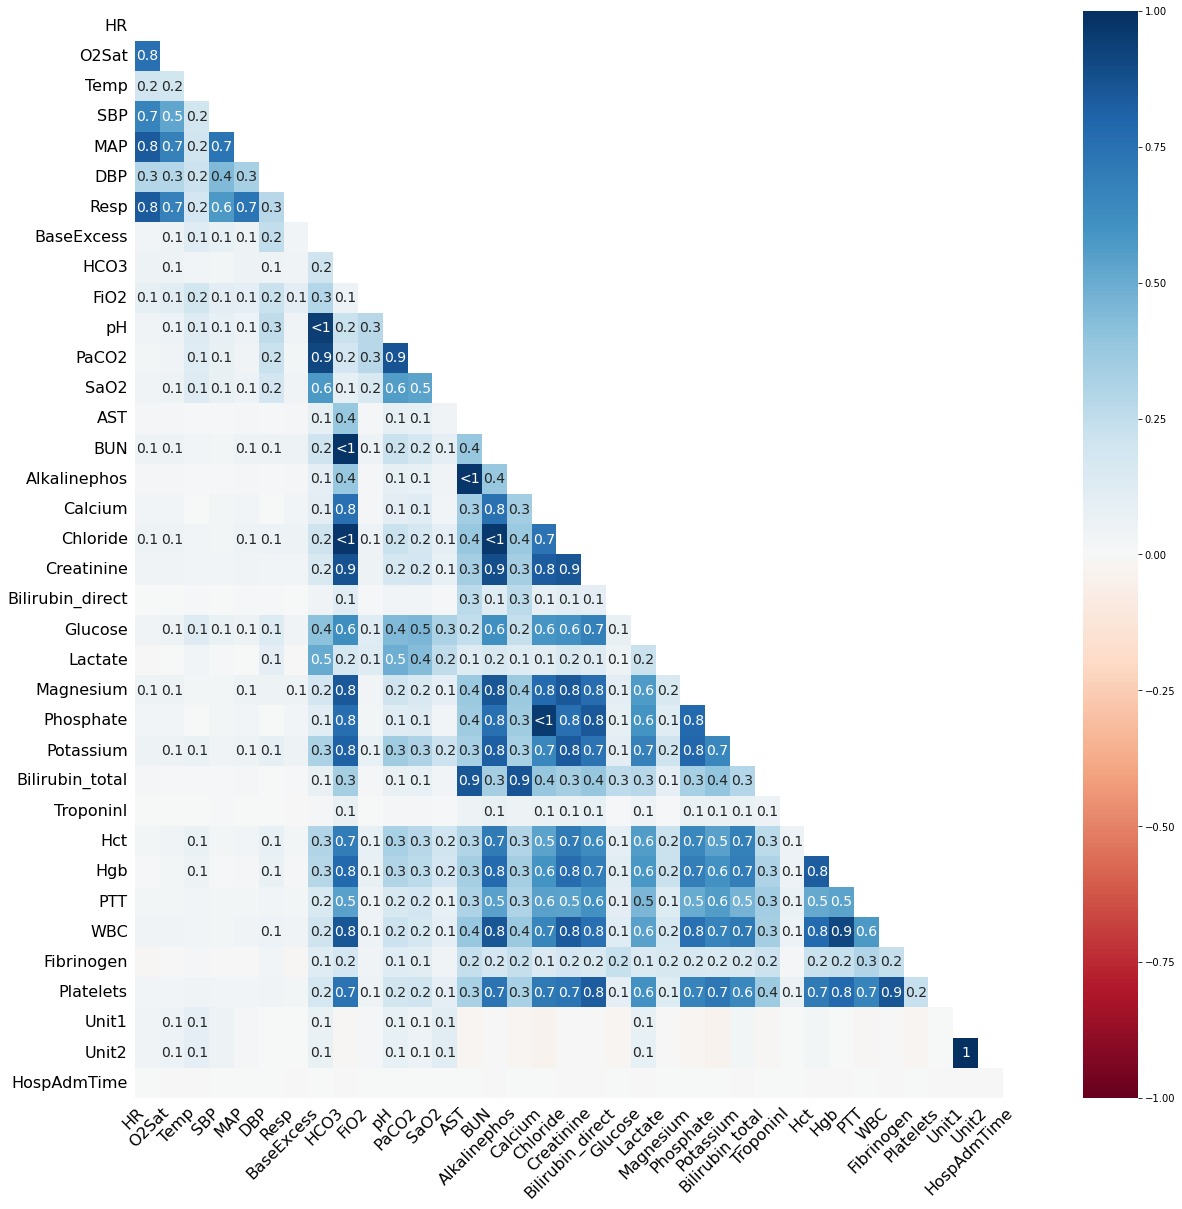

In [7]:
''' 
Heat Map
'''
msno.heatmap(df, figsize=(20,20))

In [55]:
'''
DataSet Review.

We can see that more than half of features miss about 80% of data.
Reason for that is very likly the fact that some of this attributes are measured less freqently and or only in case
patients state worsens.
Dataset contains only 2% of patients that are sepsis positive.
The fact that dataset is extremely imbalanced and misses a lot of values presents a major challange for our classification models.
'''

''' 
Sepsis Sympotms.

1. Fever abover 38ºC (101ºF) or below 36ºC (96.8ºF) -> Temp [ºC]
2. Heart Rate higher than 90 beats per minute -> HR [beats/min]
3. Breathing rate higher than 20 breaths per min -> Resp [breaths per minute]
4. Systolic Blood Pressure less than or equal to 100 mm of mercury -> SBP [mm Hg]
5. Arterial carbon dioxide tension of less than 32 mm Hg -> PaCO2
6. Abnormal White blood cell count ( > 12000/mL or < 4000//mL) -> WBC

Symptoms of Severe Sepsis and Septic Shock:
1. Platlet count is very low i.e below 80,000/mm3 -> Platlets [count*10^3/µL]
2. Very Low Blood Pressure. i.e less than 65 mm of mercury -> SBP [mm Hg]
3. Hight dose of lactic acid in your blood after you have recieved adaquate fluid replacement. -> Lactate Lactic acid (mg/dL)

Sepsis is more common if:
1. Age - Infants (age < 5) or old (age > 80) <- Age
2. Have diabetes. Contributing factor of diabetis -> Glucode Serum glucose (mg/dL)
'''

' \nSepsis Sympotms.\n\n1. Fever abover 38ºC (101ºF) or below 36ºC (96.8ºF) -> Temp [ºC]\n2. Heart Rate higher than 90 beats per minute -> HR [beats/min]\n3. Breathing rate higher than 20 breaths per min -> Resp [breaths per minute]\n4. Systolic Blood Pressure less than or equal to 100 mm of mercury -> SBP [mm Hg]\n5. Arterial carbon dioxide tension of less than 32 mm Hg -> PaCO2\n6. Abnormal White blood cell count ( > 12000/mL or < 4000//mL) -> WBC\n\nSymptoms of Severe Sepsis and Septic Shock:\n1. Platlet count is very low i.e below 80,000/mm3 -> Platlets [count*10^3/µL]\n2. Very Low Blood Pressure. i.e less than 65 mm of mercury -> SBP [mm Hg]\n3. Hight dose of lactic acid in your blood after you have recieved adaquate fluid replacement. -> Lactate Lactic acid (mg/dL)\n\nSepsis is more common if:\n1. Age - Infants (age < 5) or old (age > 80) <- Age\n2. Have diabetes. Contributing factor of diabetis -> Glucode Serum glucose (mg/dL)\n'

In [ ]:
''' 
Solutuin plan.

As mentioned before the dataset has an hourly time sequence record for each patient.
So each patient has 40 measurments spaced between 1 hour period.

There are a few approaching the problem of patient classification. 

1. Taking in time component.
    we can take in the time component as a part of the dataset, which provides us with additional information of how attributes of a patient 
    change over time. Following this approach would require us to perform time series classification, which is mostly done using Long short-term memory (LSTM) neural networks. Tradeoff of such approach is the need for high computing power.

2. Ignoring time component.
    Second solution would be to ignore the time component completly, resulting in loss of any information about attribute dynamics.
    In this case we would treat each hourly measurment as an individual patient.

3. Adding new features.
    Solution which doesnt impact the need for high computing power but also provides time dependent information may be to flatten 
    the dataframe, meaning, that we would use 4 successive hours worth of patient data to represent one patient.
    Each patient would now have 42 * 4 attributes,
    each attribute will be annotated with the hour to which the measurment belongs.
    
    for example patient_N would now have 4 features representing his heart rate
    HR_0 #hear rate at hour 0
    HR_1 #hear rate at hour 1
    HR_2 #hear rate at hour 2
    HR_3 #hear rate at hour 3

4. Using the mean of 40 hour data.
'''